# Prever nota de matemática do Enem 2016

## Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('ggplot')
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## Importando e visualizando as bases

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head(4)

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A


In [5]:
df_train.shape

(13730, 167)

In [6]:
df_test.head(4)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A


In [7]:
df_test.shape

(4576, 47)

## Definindo a seleção inicial de variáveis

In [8]:
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [9]:
features_init = ['NU_NOTA_MT', 'NU_INSCRICAO', 'NU_IDADE', 'TP_SEXO', 
                 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'IN_BAIXA_VISAO', 
                 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 
                 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 
                 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'NU_NOTA_CN', 'NU_NOTA_CH', 
                 'NU_NOTA_LC', 'TP_LINGUA', 'NU_NOTA_REDACAO', 'Q025']

In [10]:
df_train_features = df_train[features_init]
df_train_features.head()

,NU_NOTA_MT,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,...,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,NU_NOTA_REDACAO,Q025
0,399.4,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,24,M,1,1,0,0,0,0,...,0,1,1,1,436.3,495.4,581.2,1,520.0,A
1,459.8,2c3acac4b33ec2b195d77e7c04a2d75727fad723,17,F,3,2,0,0,0,0,...,0,1,1,1,474.5,544.1,599.0,1,580.0,A
2,NaN,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,21,F,3,3,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,1,NaN,A
3,NaN,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,25,F,0,1,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,0,NaN,B
4,NaN,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,28,M,2,1,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,1,NaN,A


In [11]:
features_init2 = ['NU_INSCRICAO', 'NU_IDADE', 'TP_SEXO', 
                 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'IN_BAIXA_VISAO', 
                 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 
                 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 
                 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'NU_NOTA_CN', 'NU_NOTA_CH', 
                 'NU_NOTA_LC', 'TP_LINGUA', 'NU_NOTA_REDACAO', 'Q025']

In [12]:
df_test_features = df_test[features_init2]
df_test_features.head()

,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,...,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,NU_NOTA_REDACAO,Q025
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,22,F,3,1,0,0,0,0,0,...,0,1,1,1,464.8,443.5,431.8,0,420.0,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,26,F,3,1,0,0,0,0,0,...,0,1,1,1,391.1,491.1,548.0,1,580.0,B
2,b38a03232f43b11c9d0788abaf060f7366053b6d,21,M,1,2,0,0,0,0,0,...,0,1,1,1,595.9,622.7,613.6,0,320.0,B
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,27,F,3,1,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,0,NaN,B
4,715494628a50142ce8cb17191cfe6d0f3cae0934,18,M,1,2,0,0,0,0,0,...,0,1,1,1,592.9,492.6,571.4,1,320.0,B


## Visualizando as features com valores nulos

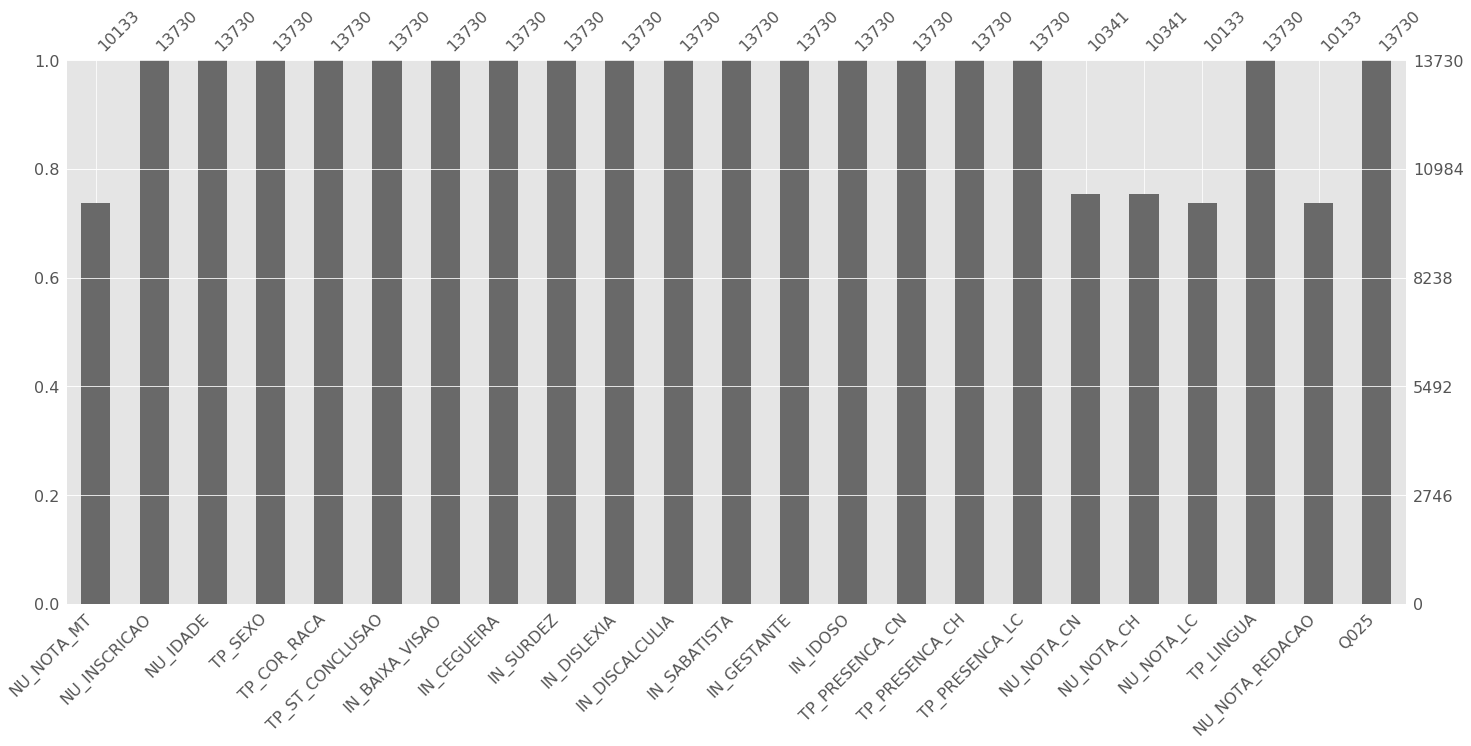

In [13]:
msno.bar(df_train_features)
plt.show()

In [14]:
status_train = pd.DataFrame({'columns': df_train_features.columns,
                             'type': df_train_features.dtypes,
                             'Sum of NaN': df_train_features.isnull().sum(),
                             'NaN%': df_train_features.isnull().sum()/len(df_train_features)})
status_train.reindex(columns=['type','Sum of NaN','NaN%']).sort_values(by = 'Sum of NaN', ascending=False)

,type,Sum of NaN,NaN%
NU_NOTA_MT,float64,3597,0.261981
NU_NOTA_REDACAO,float64,3597,0.261981
NU_NOTA_LC,float64,3597,0.261981
NU_NOTA_CH,float64,3389,0.246832
NU_NOTA_CN,float64,3389,0.246832
IN_GESTANTE,int64,0,0.000000
TP_LINGUA,int64,0,0.000000
TP_PRESENCA_LC,int64,0,0.000000
TP_PRESENCA_CH,int64,0,0.000000
TP_PRESENCA_CN,int64,0,0.000000


## Alterando variáveis

In [15]:
df_train_features = df_train_features.replace({'TP_SEXO': {'M': 1, 'F': 0}})
df_train_features = df_train_features.replace({'Q025': {'B': 1, 'A': 0}})
df_train_features = df_train_features.replace({'TP_COR_RACA': {2: 0, 3: 0, 4: 0, 5: 0}})
df_train_features = df_train_features.replace({'TP_ST_CONCLUSAO': {2: 0, 3: 0, 4: 0}})

In [16]:
df_train_features['IN_ESP'] = np.int64(df_train_features.IN_BAIXA_VISAO | df_train_features.IN_CEGUEIRA |
                                     df_train_features.IN_SURDEZ | df_train_features.IN_DISLEXIA |
                                     df_train_features.IN_DISCALCULIA | df_train_features.IN_SABATISTA | 
                                     df_train_features.IN_GESTANTE | df_train_features.IN_IDOSO)

In [17]:
cols_to_drop = ['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA', 
                'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO']
df_train_features.drop(columns = cols_to_drop, inplace = True)

Neste passo transformei as features TP_SEXO e Q025 (Na sua residência tem acesso à internet?) em tipo numérico. Além disso, transformei as variáveis TP_COR_RACA e TP_ST_CONCLUSAO em binárias. (Essas features tinham mais de duas classificações e decidi transformá-las em apenas duas, sendo TP_COR_RACA {Branco, não branco} e TP_ST_CONCLUSAO {Ensino Médio concluído ou não}). Já as features de atendimento especializado transformei em uma só "IN_ESP".

In [18]:
df_test_features = df_test_features.replace({'TP_SEXO': {'M': 1, 'F': 0}})
df_test_features = df_test_features.replace({'Q025': {'B': 1, 'A': 0}})
df_test_features = df_test_features.replace({'TP_COR_RACA': {2: 0, 3: 0, 4: 0, 5: 0}})
df_test_features = df_test_features.replace({'TP_ST_CONCLUSAO': {2: 0, 3: 0, 4: 0}})

In [19]:
df_test_features['IN_ESP'] = np.int64(df_test_features.IN_BAIXA_VISAO | df_test_features.IN_CEGUEIRA |
                                     df_test_features.IN_SURDEZ | df_test_features.IN_DISLEXIA |
                                     df_test_features.IN_DISCALCULIA | df_test_features.IN_SABATISTA | 
                                     df_test_features.IN_GESTANTE | df_test_features.IN_IDOSO)

## Visualizando a correlação entre as variáveis selecionadas

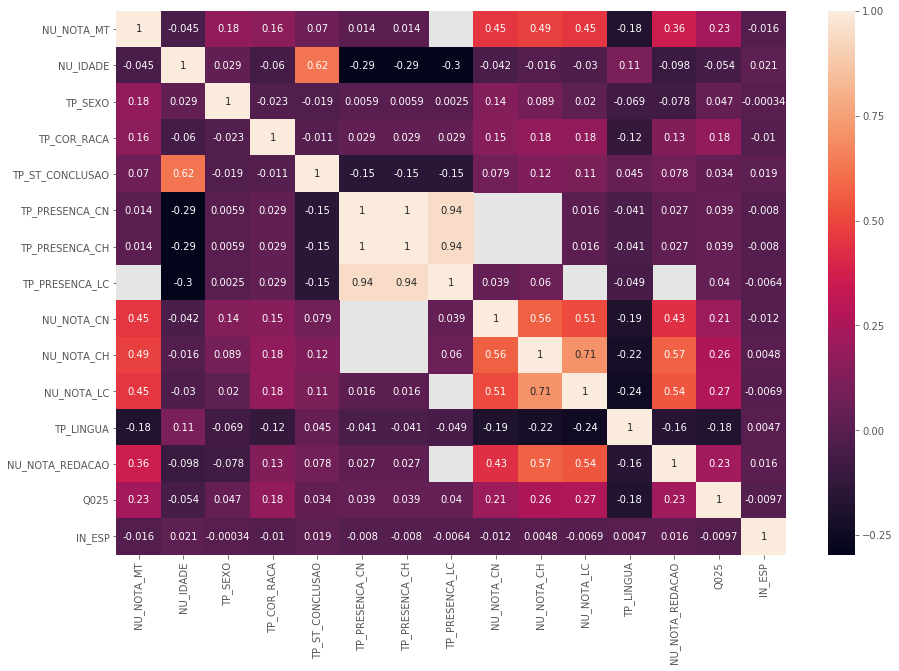

In [20]:
corr = df_train_features.corr(method = 'spearman')
ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})

## Alterando os dados faltantes

In [21]:
df_train_features = df_train_features.fillna(-500)
df_train_features.isnull().sum().sort_values(ascending = False).head()

IN_ESP             0
Q025               0
NU_NOTA_REDACAO    0
TP_LINGUA          0
NU_NOTA_LC         0
dtype: int64

In [22]:
df_test = df_test_features.fillna(-500)

## Seleção de variáveis

In [23]:
features_ult = ['NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 
                'TP_ST_CONCLUSAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 
                'TP_LINGUA', 'NU_NOTA_REDACAO', 'Q025', 'IN_ESP']

In [30]:
x_train_bal, y_train_bal = (df_train_features[features_ult], df_train_features['NU_NOTA_MT'])

In [31]:
x_train, x_val, y_train, y_val = train_test_split(x_train_bal, y_train_bal, test_size = 0.2, random_state=42)

In [32]:
x_test = df_test[features_ult]

## Transformando as variáveis

In [33]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)
x_test = sc.transform(x_test)

## Modelo de Regressão

In [34]:
regressor = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 100,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False)

In [35]:
regressor.fit(x_train, y_train)

RandomForestRegressor(criterion='mae', max_depth=8, n_jobs=-1, random_state=0)

In [36]:
y_pred_val = regressor.predict(x_val)

In [37]:
print('MAE:', metrics.mean_absolute_error(y_val, y_pred_val).round(8))
print('MSE:', metrics.mean_squared_error(y_val, y_pred_val).round(8))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)).round(8))

MAE: 42.0461362
MSE: 3993.88185519
RMSE: 63.19716651


In [38]:
y_pred_train = regressor.predict(x_train)
y_pred_test = regressor.predict(x_test)

In [39]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train).round(8))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train).round(8))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(8))

MAE: 39.71052977
MSE: 3497.43586432
RMSE: 59.13912296


## Resultado

In [40]:
df_answer = pd.DataFrame()
df_answer['NU_INSCRICAO'] = df_test['NU_INSCRICAO']
df_answer['TP_PRESENCA_CN'] = df_test['TP_PRESENCA_CN']
df_answer['NU_NOTA_MT'] = np.around(y_pred_test)

In [41]:
df_answer

,NU_INSCRICAO,TP_PRESENCA_CN,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,1,414.0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,1,433.0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,1,591.0
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0,-500.0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,1,538.0
5,e656d6bad65c93fb2880f1eba5037008c8e75774,1,476.0
6,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,1,500.0
7,11539e86171bf07d3a36f09377d7f54ebcc8406a,1,420.0
8,043c544a2104aa8a9849f1a703a08d37a2f16839,1,477.0
9,76ba050e64ad100b856f0eaabd8f539d5c7dd185,1,439.0


In [43]:
for index, row in df_answer.iterrows():
    if row['TP_PRESENCA_CN'] == 0:
        df_answer.loc[index,'NU_NOTA_MT'] = 'NaN'

In [44]:
df_answer

,NU_INSCRICAO,TP_PRESENCA_CN,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,1,414
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,1,433
2,b38a03232f43b11c9d0788abaf060f7366053b6d,1,591
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0,NaN
4,715494628a50142ce8cb17191cfe6d0f3cae0934,1,538
5,e656d6bad65c93fb2880f1eba5037008c8e75774,1,476
6,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,1,500
7,11539e86171bf07d3a36f09377d7f54ebcc8406a,1,420
8,043c544a2104aa8a9849f1a703a08d37a2f16839,1,477
9,76ba050e64ad100b856f0eaabd8f539d5c7dd185,1,439


In [45]:
df_answer.drop(['TP_PRESENCA_CN'], axis =1, inplace = True)

In [46]:
df_answer.to_csv('answer.csv', index=False, header=True)

Resultado 93,76%